In [16]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [ ]:
x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])

In [ ]:
class LinearRegression:
    def __init__(self, lr=0.01, n_epoch=10):
        self.lr=lr
        self.n_epoch=n_epoch
        self.weight=None
        self.bias=None

    def fit(self, X, y):

        self.weight=0
        self.bias=0

        for _ in range(self.n_epoch):
            dw = (2*(self.weight*X+self.bias-y)*X).mean()
            db= (2*(self.weight*X+self.bias-y)).mean()

            self.weight-=dw*self.lr
            self.bias-=db*self.lr

    def predict(self, X):
        return self.weight*X+self.bias


In [ ]:
model=LinearRegression()
model.fit(x,y)

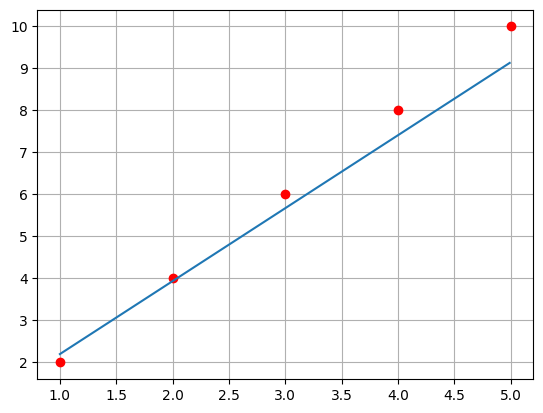

In [ ]:

xv=np.arange(1,5,0.01)
y_pred_line=model.predict(xv)

fig=plt.figure()

plt.plot(x,y,'ro')
plt.plot(xv, y_pred_line)
plt.grid()
plt.show()

### Using torch

In [20]:
class LR_T(nn.Module):
    def __init__(self, input, output, lr=0.01, n_epoch=10):
        super(LR_T, self).__init__()
        self.linear=nn.Linear(input, output)
        self.lr=lr
        self.n_epoch=n_epoch

    def __forward__(self, X):
        return self.linear(X)


    def fit(self, X, y):
        with torch.inference_mode():
            self.linear.weight[0,0] = 0
            self.linear.bias[0] = 0

        lossfunc=nn.MSELoss()
        optimizer=torch.optim.SGD(self.linear.parameters(), lr=self.lr)

        for _ in range(self.n_epoch):
            y_pred=self.__forward__(X)
            loss=lossfunc(y, y_pred)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


    def predict(self, X):
        return self.__forward__(X)




In [21]:
xt=torch.tensor([1,2,3,4,5],dtype=torch.float32).reshape(-1,1)
yt=torch.tensor([2,4,6,8,10],dtype=torch.float32).reshape(-1,1)
mymodel=LR_T(1,1)
mymodel.fit(xt,yt)

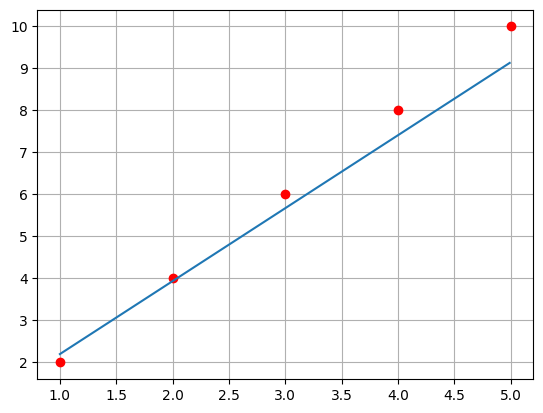

In [22]:

with torch.inference_mode():
    xv=torch.from_numpy(np.arange(1,5,0.01).astype(np.float32)).reshape(-1,1)
    y_pred_line=mymodel.predict(xv)

    fig=plt.figure()
    plt.plot(xt,yt,'ro')
    plt.plot(xv, y_pred_line)
    plt.grid()
    plt.show()

Note 1: Sometimes we would put training outside the class. In that case, we would have just `__init__` and `forward` methods.

Note 2: The double underscore (in for example `__init__`) is just to tell us that this method is not designed to be called outside of the class.